# Objectives
1. Basic plot: introduction 
2. FacetGrid
3. Relational plots: relplot(kind='')
   - 3.1 scatterplot()
   - 3.2 lineplot()
4. Categorical plots: catplot(kind='')
   - 4.1 statistical plots: countplot(), barplot(), pointplot()
   - 4.2 variables comparsion: stripplot(), swarmplot()
   - 4.3 abstract representation: boxplot(), violinplot(), boxenplot()
5. Distribution plot: displot( kde = True, rug = True, ecdf = True)
6. Regression plots: lmplot(hue='', row='', col='')
   - 6.1 regplot()
   - 6.2 residplot()
7. Customizing 
8. Matrix plot
9. PairGrid and pairplot
10. JointGrid and jointplot

## Basic plots

In [ ]:
# Axes can be passed to seaborn functions
fig, ax = plt.subplots()
sns.histplot(df['Tuition'], ax = ax)
ax.set(xlabel = 'Tuition 2013-14')

**Making a scatter plot with lists**

In [ ]:
student_data.head()

In [ ]:
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Change the legend order in the scatter plot
sns.scatterplot(x="absences", y="G3", 
                data=student_data, 
                hue="location", hue_order=['Rural','Urban'])

# Show plot
plt.show()

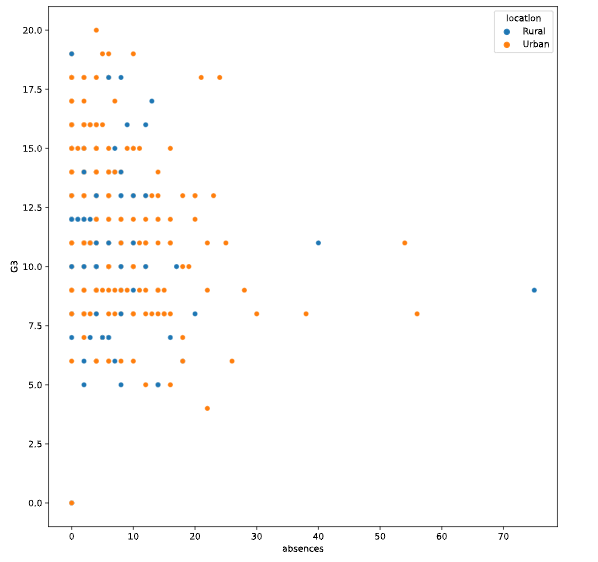

**Making a count plot with a list**

In [ ]:
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary mapping subgroup values to colors
palette_colors = {'Rural': "green", 'Urban': "blue"}

# Create a count plot of school with location subgroups
sns.countplot(x='school',data=student_data,hue='location',palette=palette_colors)

# Display plot
plt.show()

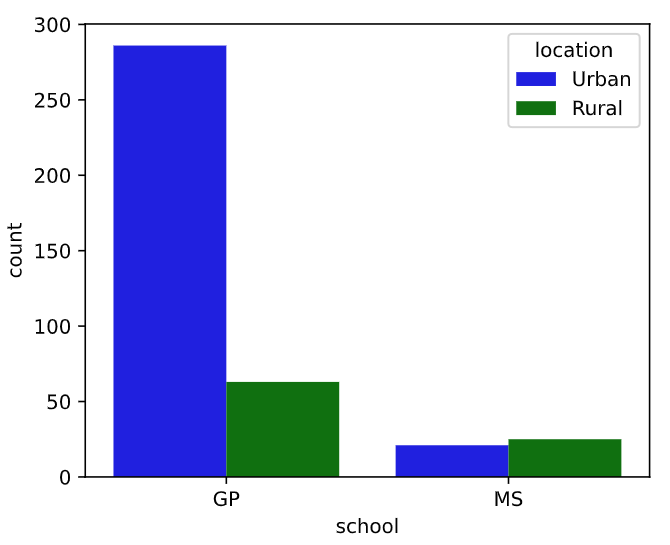

## 2. FacetGrid

In [ ]:
g = sns.FacetGrid(df, col='HIGHDEG')
g.map(sns.boxplot, 'Tuition'
     order = ['1', '2', '3', '4'])
# sns.catplot() can replace it 

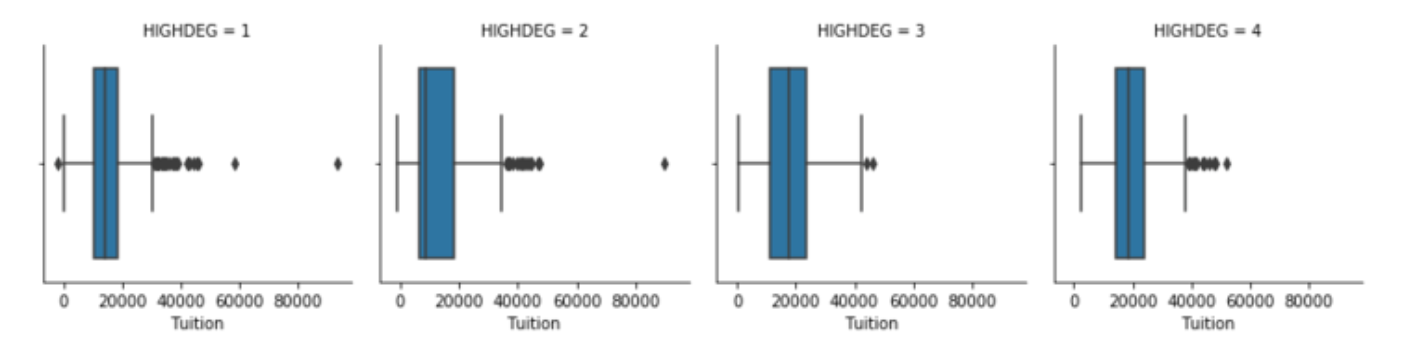

In [ ]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df, 
             row="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

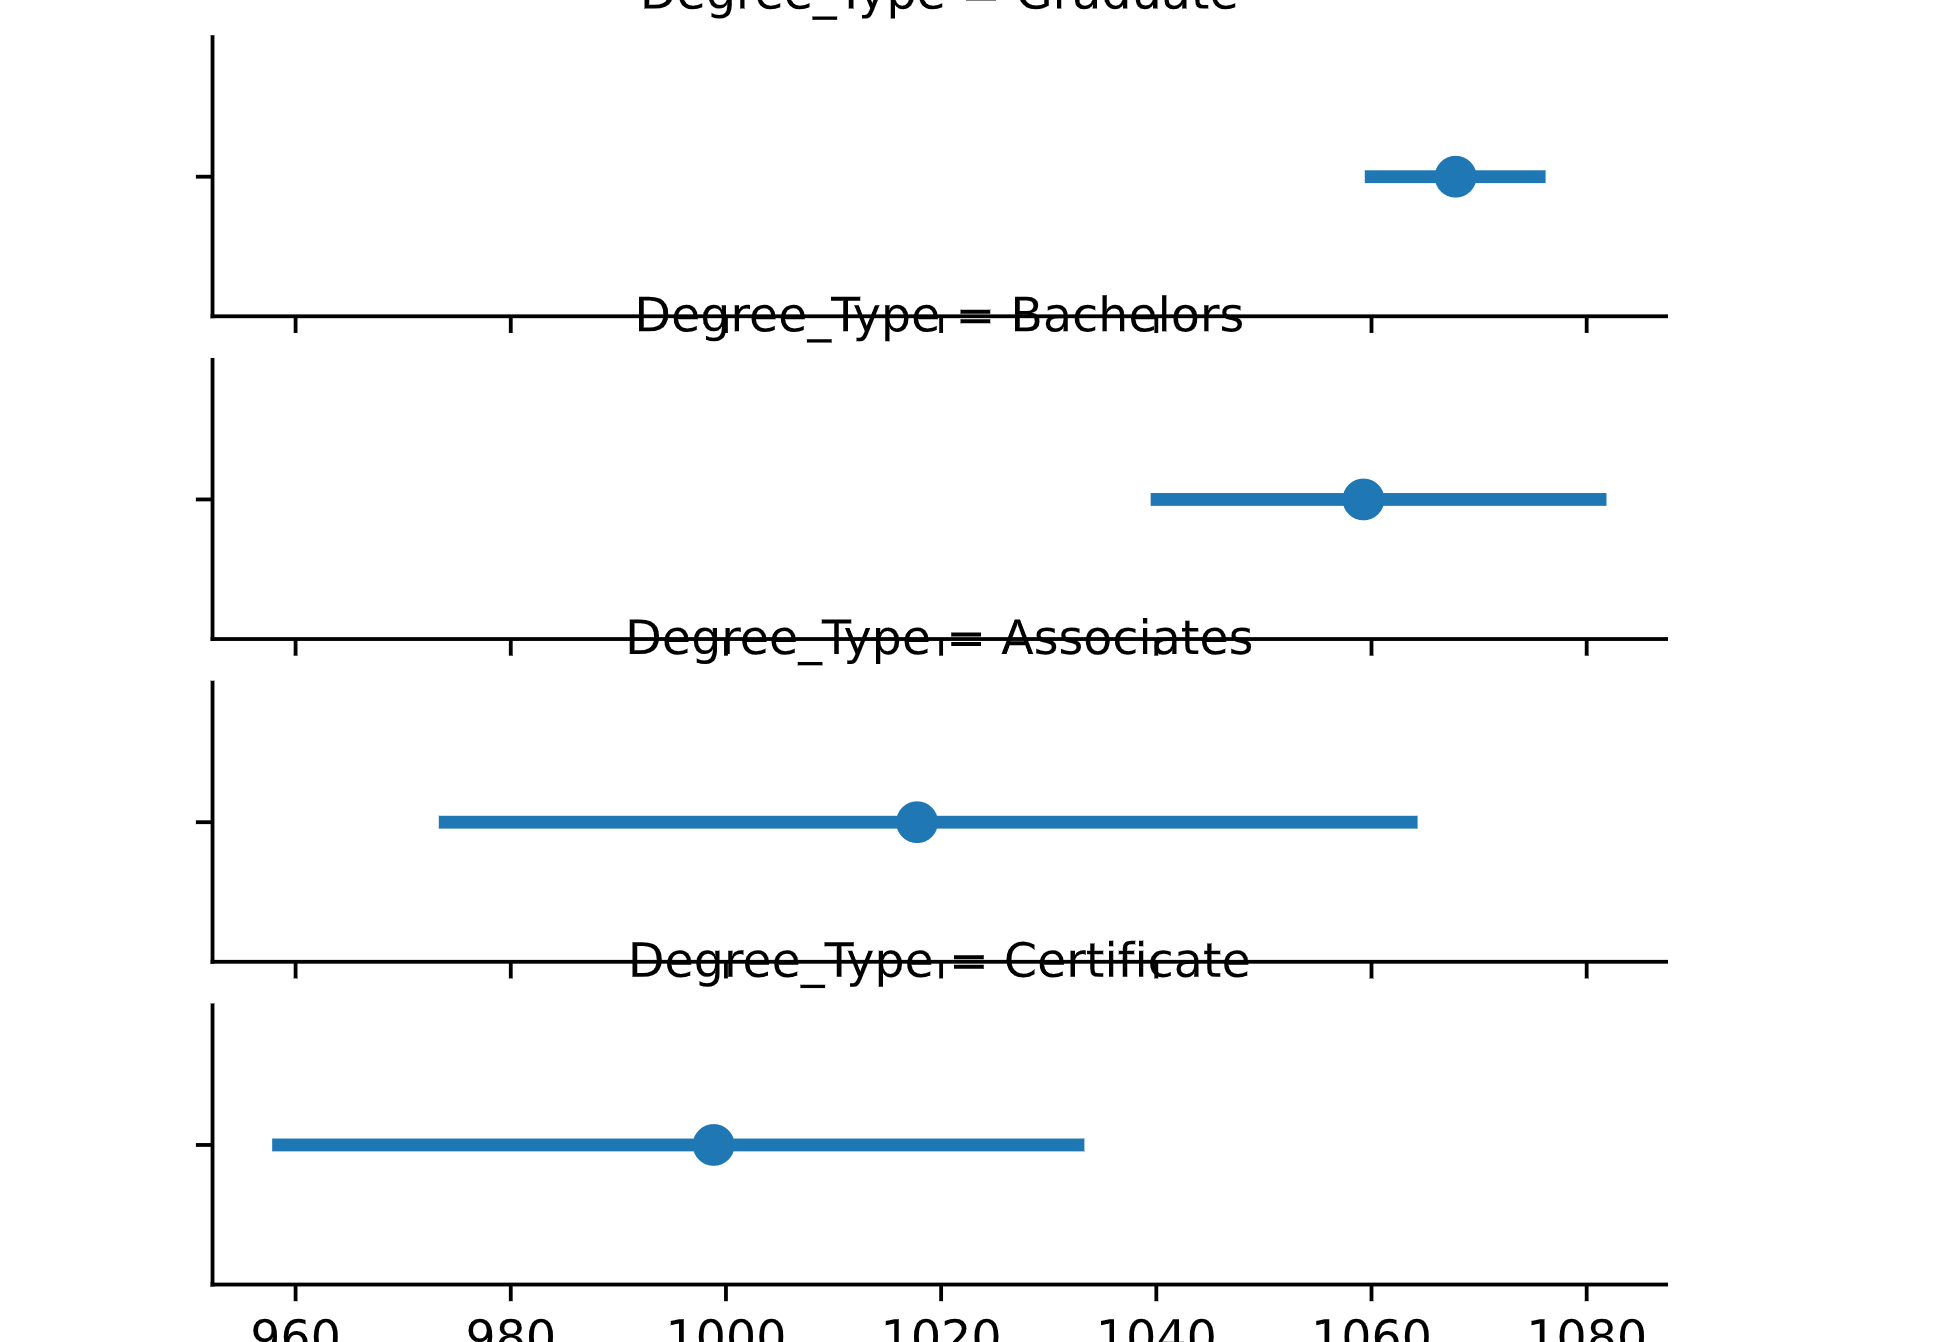

In [ ]:
g = sns.FacetGrid(df, col='HIGHDEG')
g.map(plt.scatter, 'Tuition', 'SAT_AVG_ALL'
# sns.relplot() can replace it

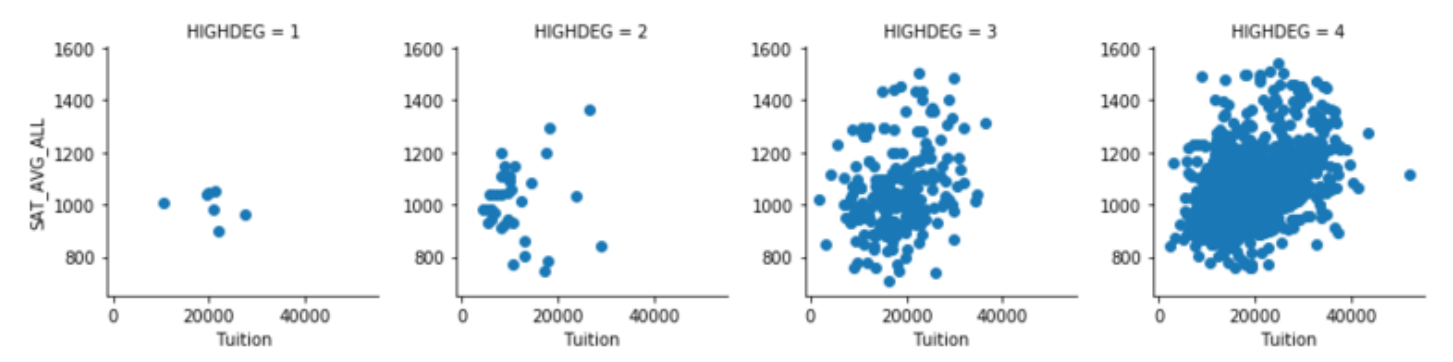

## 3. Visualizing two Quantitative Variables

### 3.1 FaceGrid Relational plots: 
      - sns. relplot()
### 3.2 AxesSubplots: 
      - sns.scatterplot()
      - sns.lineplot()

In [ ]:
# Creating two-factor subplots
# Change this scatter plot to arrange the plots in rows instead of columns
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter", 
            row="study_time")

# Add a title 
# g.fig.suptitle("FaceGrid Title")

# Show plot
plt.show()

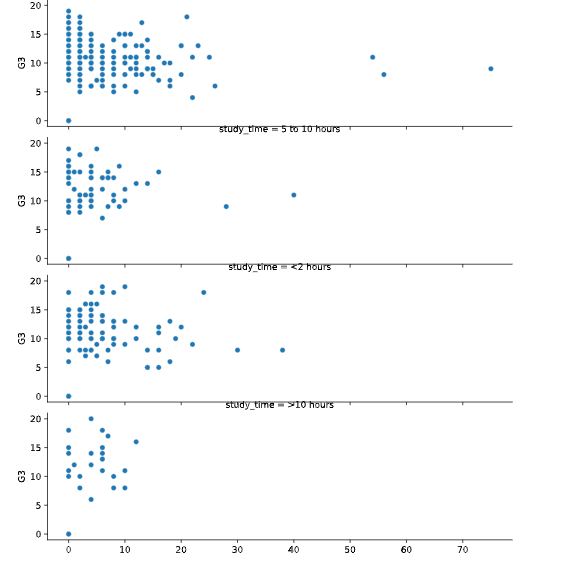

In [ ]:
# Creating two-factor subplots
# Adjust further to add subplots based on family support
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter", 
            col="schoolsup",
            col_order=["yes", "no"],
            row='famsup',
            row_order = ['yes','no'])

# Show plot
plt.show()

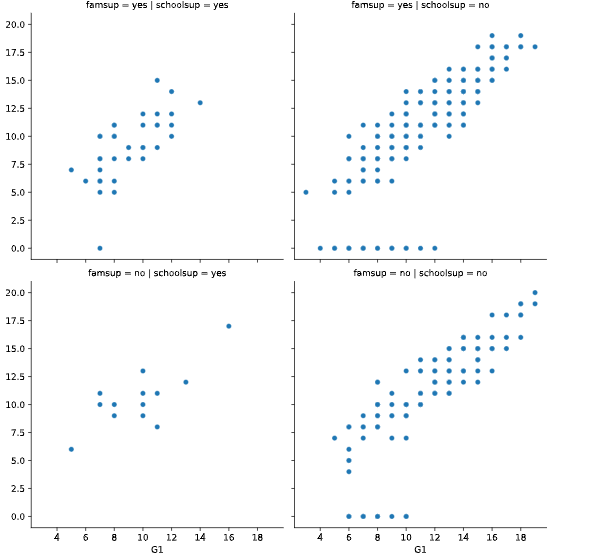

In [ ]:
# Change the style of plot points

# Create a scatter plot of acceleration vs. mpg
sns.relplot(x='acceleration',y='mpg',data=mpg,kind='scatter',style='origin',hue='origin')

# Show plot
plt.show()

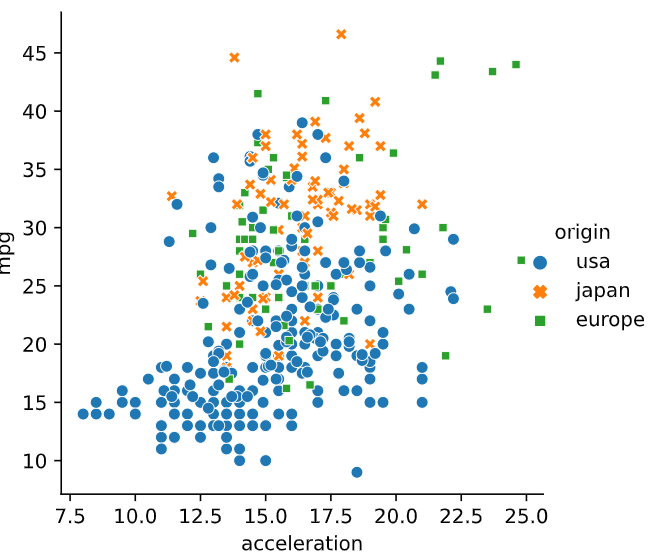

In [ ]:
# change the size
# Create scatter plot of horsepower vs. mpg
sns.relplot(x='horsepower',y='mpg',data=mpg,kind='scatter', size = 'cylinders')

# Show plot
plt.show()

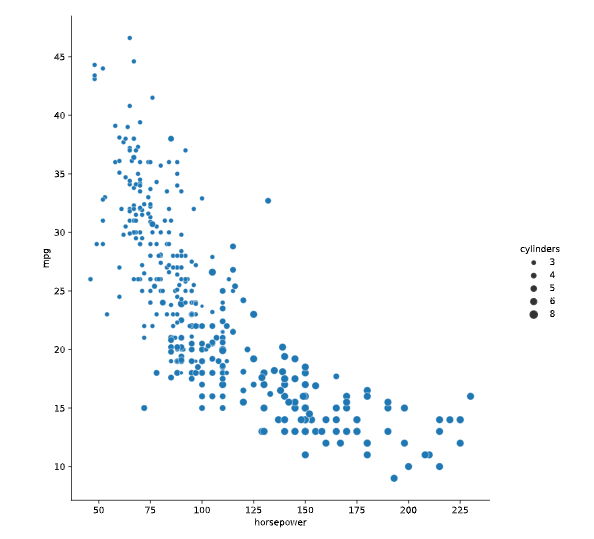

In [ ]:
# Add markers and make each line have the same style
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin", 
            hue="origin", dashes = False, markers = True)

# Show plot
plt.show()

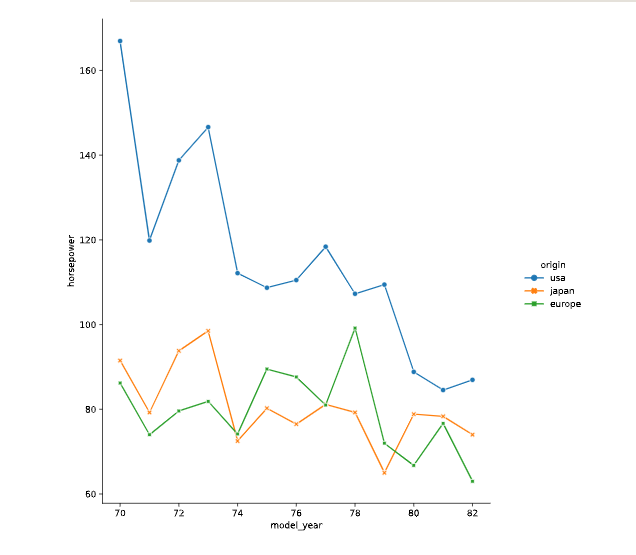

In [ ]:
# Create line plot
g = sns.lineplot(x="model_year", y="mpg_mean", 
                 data=mpg_mean,
                 hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")

# Add x-axis and y-axis labels
g.set(xlabel="Car Model Year",ylabel="Average MPG")


# Show plot
plt.show()

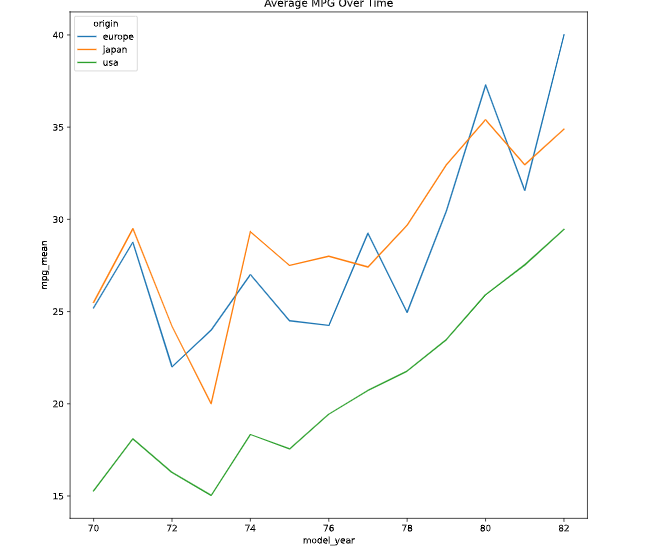

## 4. Visualizing a categorical or a qualitative variable

### - 4.1 FaceGrid Categorical plot: 
      - sns.catplot()
### - 4.2 AxesSubplots: 
      - Showing each category: 
        - sns.stripplot(): use jetter = True to see non-overlapped observations
        - sns.swarmplot(): can see each variable, but not scaled well to large dataset
      - Abstract representations: 
        - sns.boxplot(): distribution data
        - sns.violinplot(): kernel denisty plot and box plot but not show all the data points
        - sns.boxenplot(): enhanced box plot and suitable for large dataset
      - Statistical plots: 
        - sns.countplot(): number of incidences of each variable
        - sns.barplot(): estimated value and confidence interval 
        - sns.pointplot(): show CI and also see how value changes across categorical values

In [ ]:
# Create the stripplot
sns.stripplot(data=df,
         x='Award_Amount',
         y='Model Selected',
         jitter=True)

plt.show()

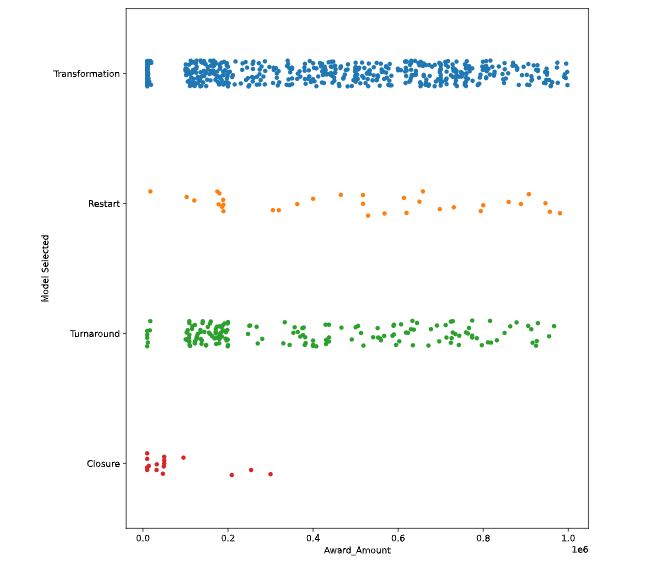

In [ ]:
# Create and display a swarmplot with hue set to the Region
sns.swarmplot(data=df,
         x='Award_Amount',
         y='Model Selected',
         hue='Region')

plt.show()

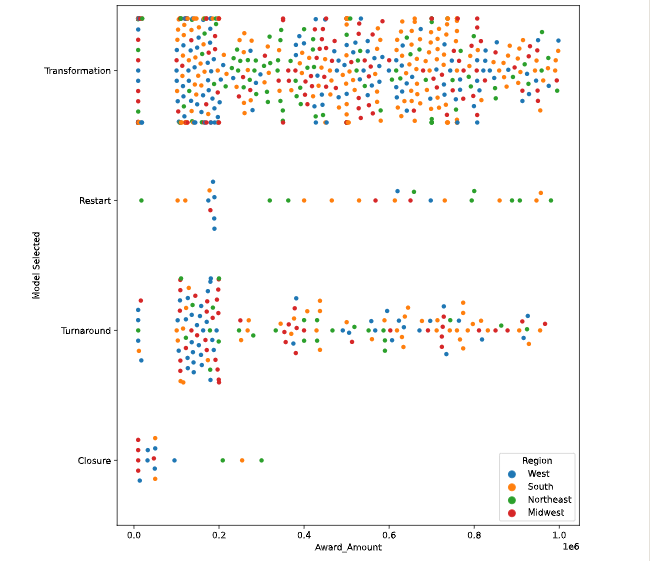

In [ ]:
# Create a violinplot with the husl palette
sns.violinplot(data=df,
         x='Award_Amount',
         y='Model Selected',
         palette='husl')

plt.show()
plt.clf()

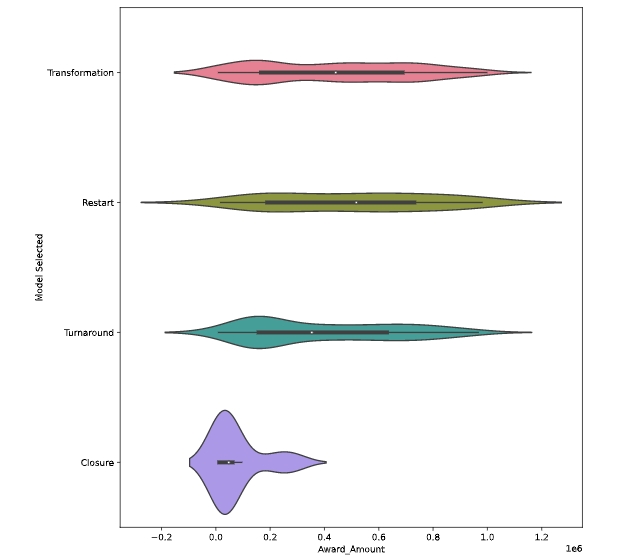

In [ ]:
# Create a boxenplot with the Paired palette and the Region column as the hue
sns.boxenplot(data=df,
         x='Award_Amount',
         y='Model Selected',
         palette='Paired',
         hue='Region')

plt.show()
plt.clf()

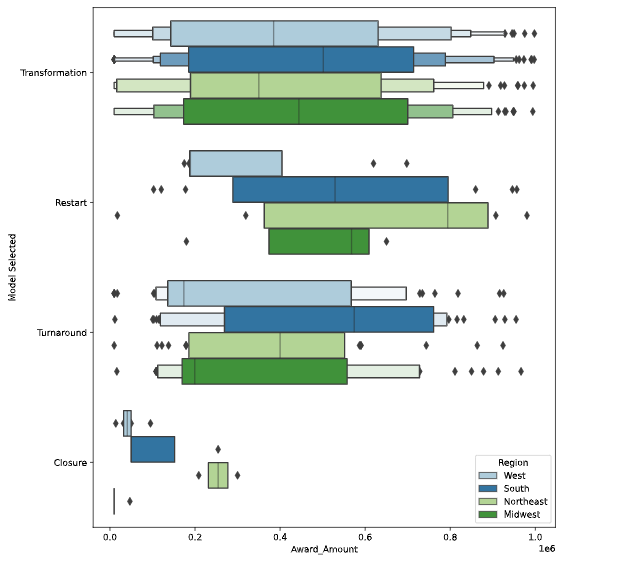

In [ ]:
# Separate into column subplots based on age category
sns.catplot(y="Internet usage", data=survey_data,
            kind="count",
            col = 'Age Category')

# Show plot
plt.show()

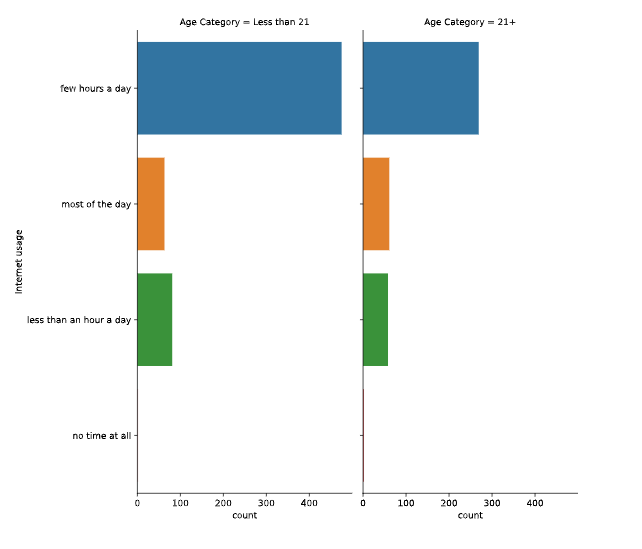

In [ ]:
# List of categories from lowest to highest
category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]

# Turn off the confidence intervals
sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar",
            order=category_order, ci=None)

# Show plot
plt.show()

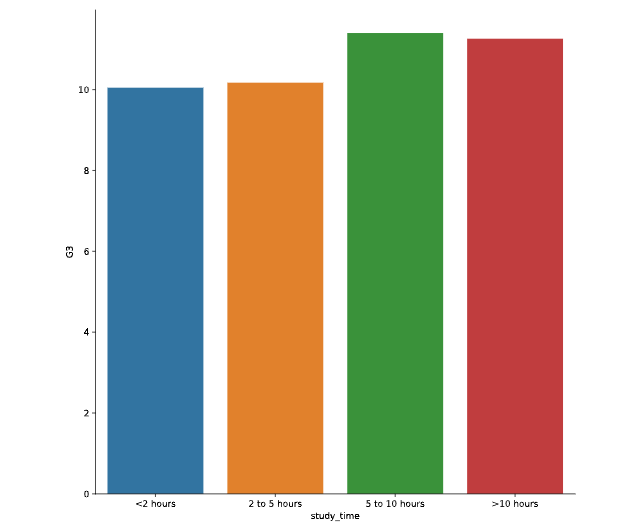

In [ ]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
# sym - omit outliers
# Set the whiskers to 0.5 * IQR
sns.catplot(x='study_time',y='G3',data=student_data, kind='box', order = study_time_order, sym='', whis=0.5)

# Show plot
plt.show()

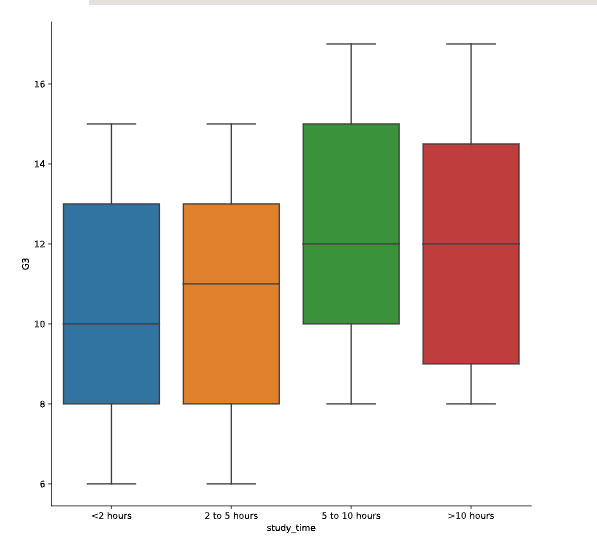

In [ ]:
# Remove the lines joining the points
sns.catplot(x="famrel", y="absences",
			data=student_data,
            kind="point",
            capsize=0.2, join = False)

# Rotate x-tick labels
plt.xticks(rotation=90)
            
# Show plot
plt.show()

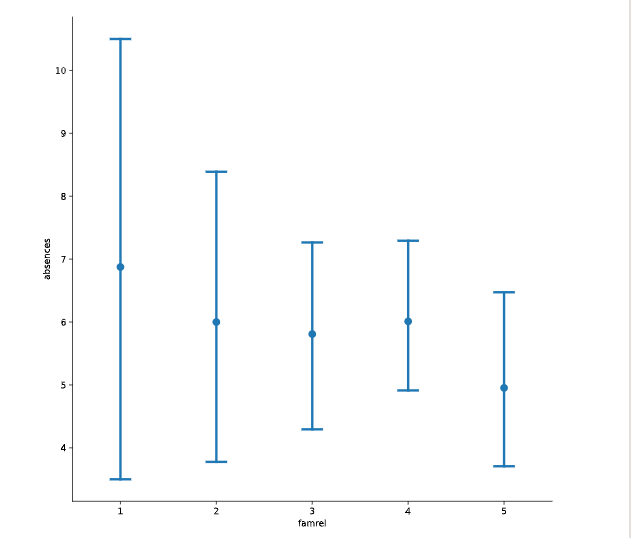

In [ ]:
# Import median function from numpy
from numpy import median

# Plot the median number of absences instead of the mean
sns.catplot(x="romantic", y="absences",
			data=student_data,
            kind="point",
            hue="school",
            ci=None, estimator=median)

# Show plot
plt.show()

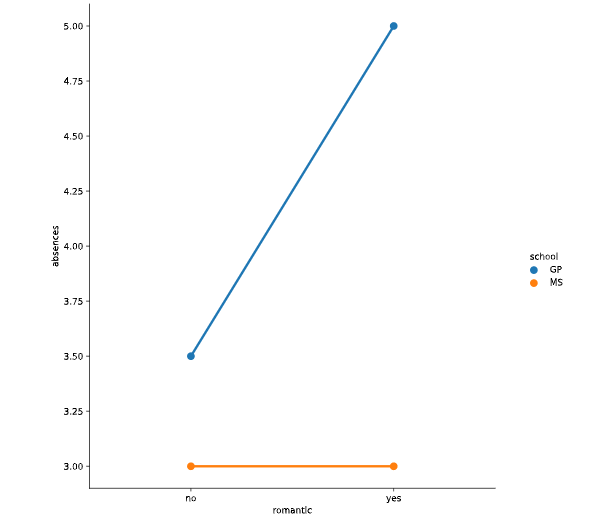

## 5. Distribution plot: 
     - sns.displot( kind = ['kde', 'rug', 'ecdf'])
*(ecdf plot shows the cumulative distribution of the data)*

In [ ]:
# kde: kernel density estimation 
# rug: x-axis ticks
# overlayers
sns.displot(df['alcohol'], kde = True, rug = True, bins = 10)

# Create a displot of the Award Amount
sns.displot(df['Award_Amount'],
             kind ='kde',
             rug = True,
             fill =True)

# Plot the results
plt.show()

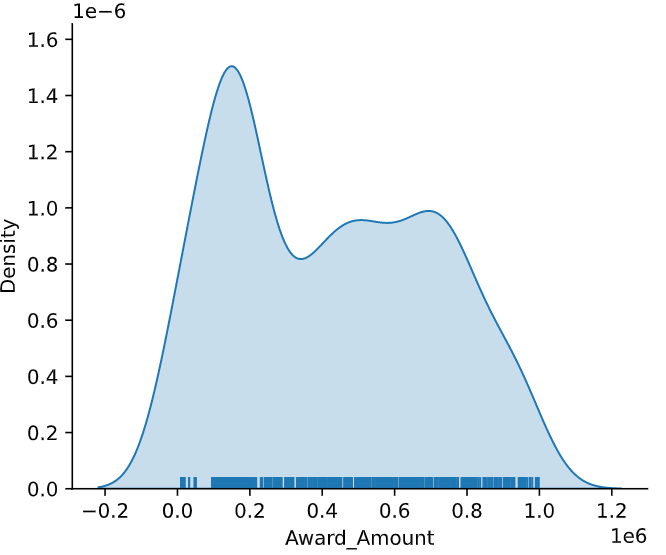

## 6. Regresssion plots: 
### 6.1 Higher level FacetGrid plot: 
      - sns.lmplot( hue = col, col/row = col  )
*(hue: organize data by colors; col: organize data by columns)* 
### 6.2 Lower level: 
      - sns.regplots()
      - sns.residplot()

In [ ]:
# Plot regression line and residual line

# Display a regression plot for Tuition
sns.regplot(data=df,
         y='Tuition',
         x='SAT_AVG_ALL',
         marker='^',
         color='g')

plt.show()
plt.clf()

# Display a regression plot for Tuition
sns.regplot(data=df,
         y='Tuition',
         x='SAT_AVG_ALL',
         marker='^',
         color='g')

plt.show()
plt.clf()

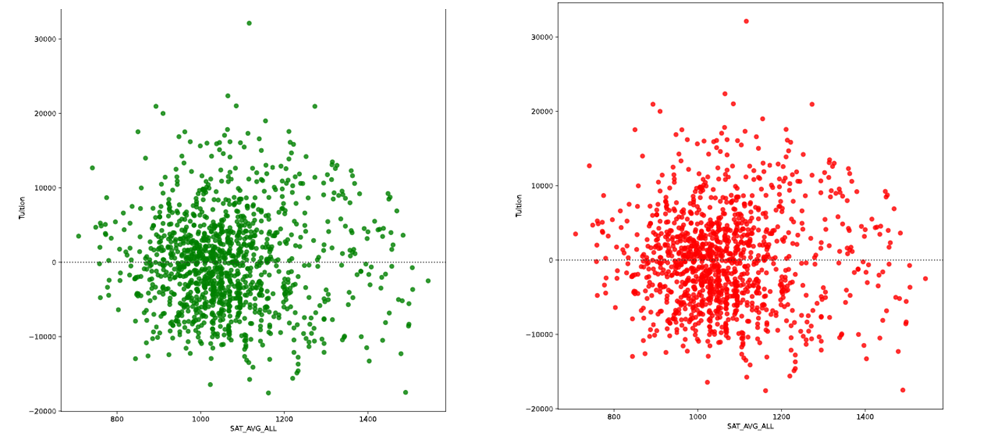

In [ ]:
# The final plot should include a line using a 2nd order polynomial
# Since this data is continuous, using x_bins can be useful to break the percentages into categories
# order = 2 means polynomial regression line
sns.regplot(data=df,
            y='Tuition',
            x='PCTPELL',
            x_bins=5,
        order=2)

plt.show()
plt.clf()

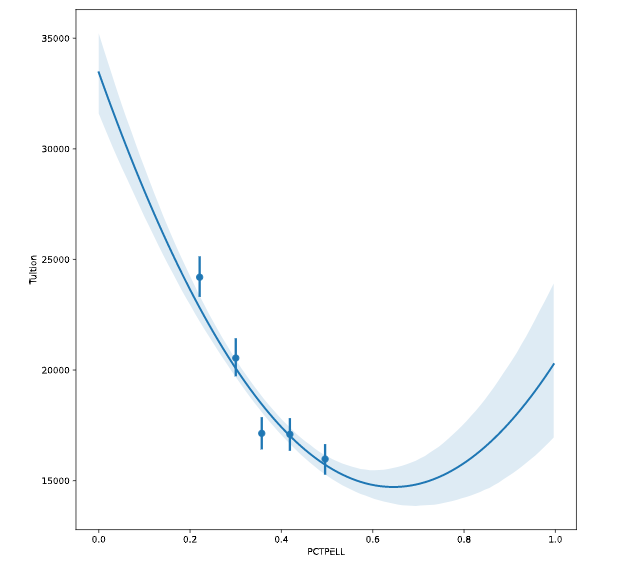

In [ ]:
# Create a regression plot with multiple rows
sns.lmplot(data=df,
           x= "insurance_losses",
           y= "premiums",
           hue = 'Region',
           col = "Region")
# argument: fit_reg = False - turn off the regression line

# Show the plot
plt.show()

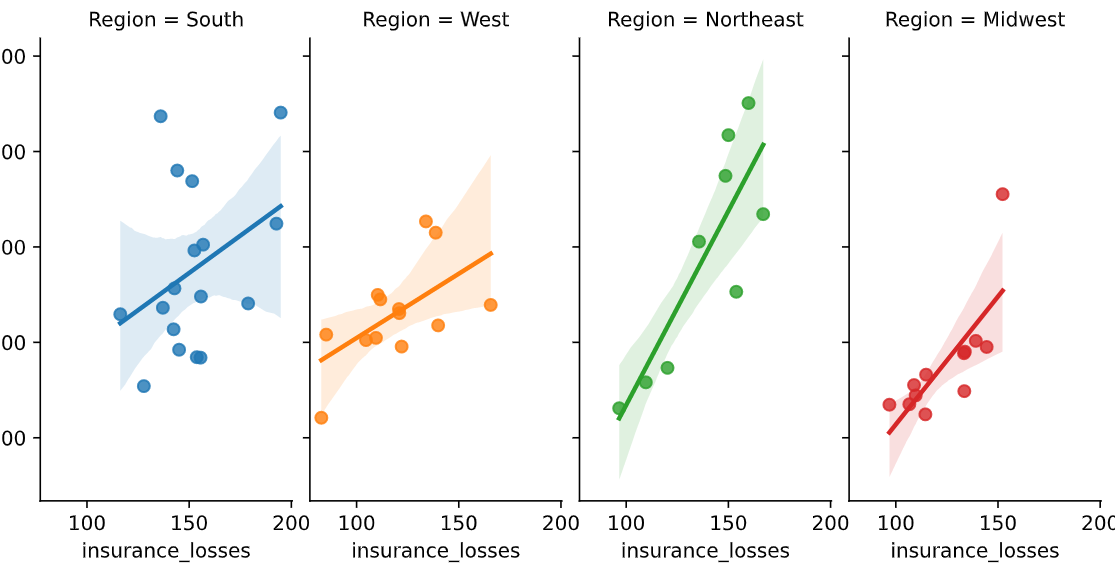

In [ ]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=inst_ord)

plt.show()
plt.clf()

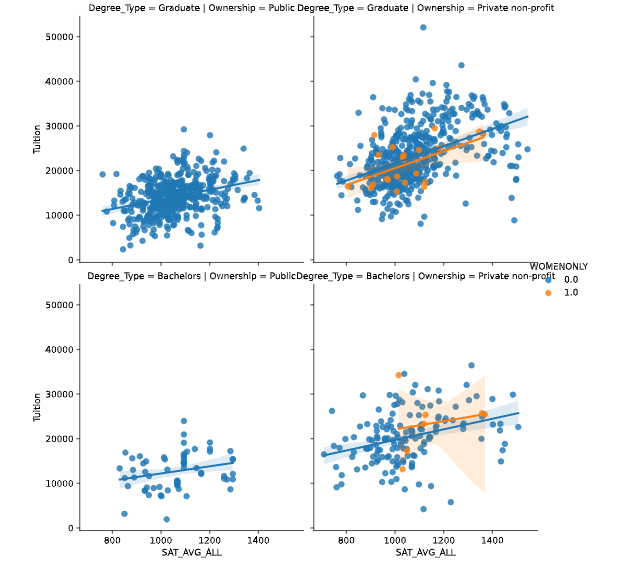

## Customizing Seaborn Plots

### Style in Seaborn

In [ ]:
# Seaborn has default configurtion that can be applied 
# this set can override matplotlib or pandas
# default is 'darkgrey'
sns.set() 

In [ ]:
for style in ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']:
    sns.set_style(style)
    sns.displot(df['Tuition'])
    plt.show()

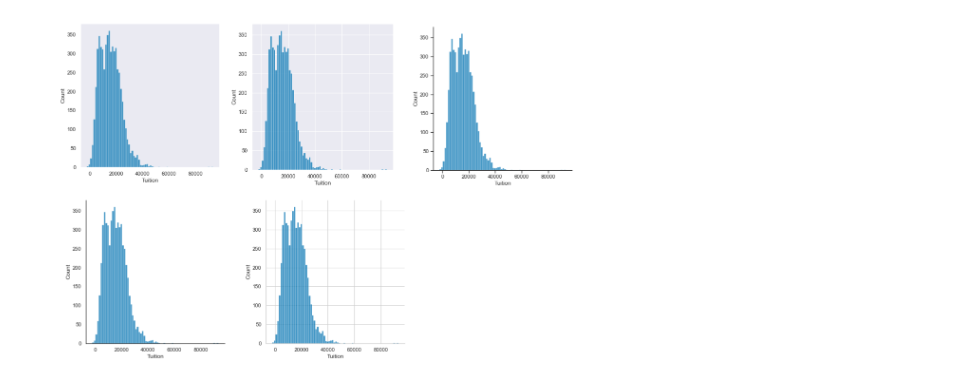

In [ ]:
# Removing spines
# Set the style to white
sns.set_style('white')

# Create a regression plot
sns.lmplot(data=df, x='pop2010', y='fmr_2')

# Remove the spines: top, bottom, left, right
# default is to remove top and right lines
sns.despine(left = True)

# Show the plot and clear the figure
plt.show()
plt.clf()

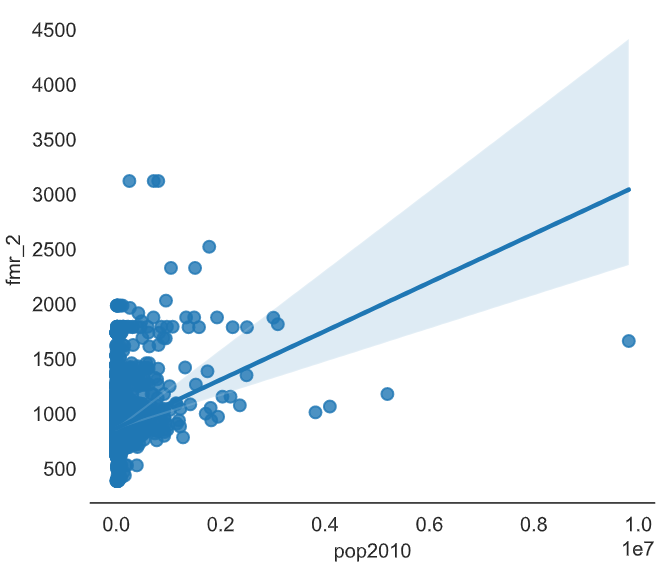

In [ ]:
# Change the color palette to "RdBu"
sns.set_style("whitegrid")

sns.set_palette("RdBu")
# Change the context to "poster", others are paper, notebook and talk
sns.set_context("poster")

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes", 
                  "Often", "Always"]

sns.catplot(x="Parents Advice", 
            data=survey_data, 
            kind="count", 
            order=category_order)

# Show plot
plt.show()

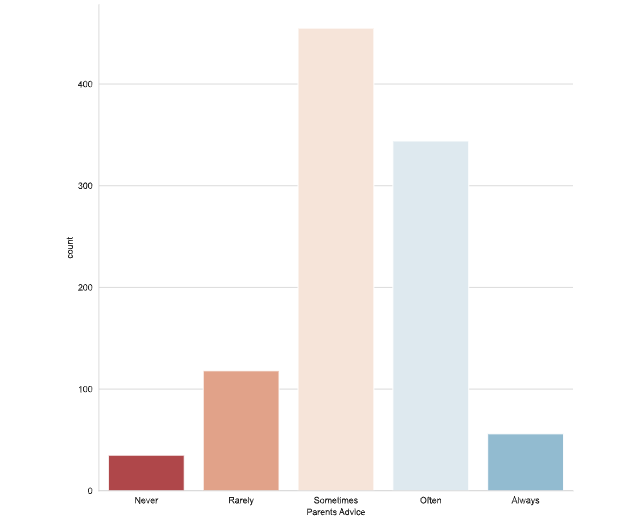

### Colors in Seaborn

In [ ]:
# Using matplotlib color 

# Set style, enable color code, and create a magenta displot
sns.set(color_codes=True)
sns.displot(df['fmr_3'], color='m')

# Show the plot
plt.show()

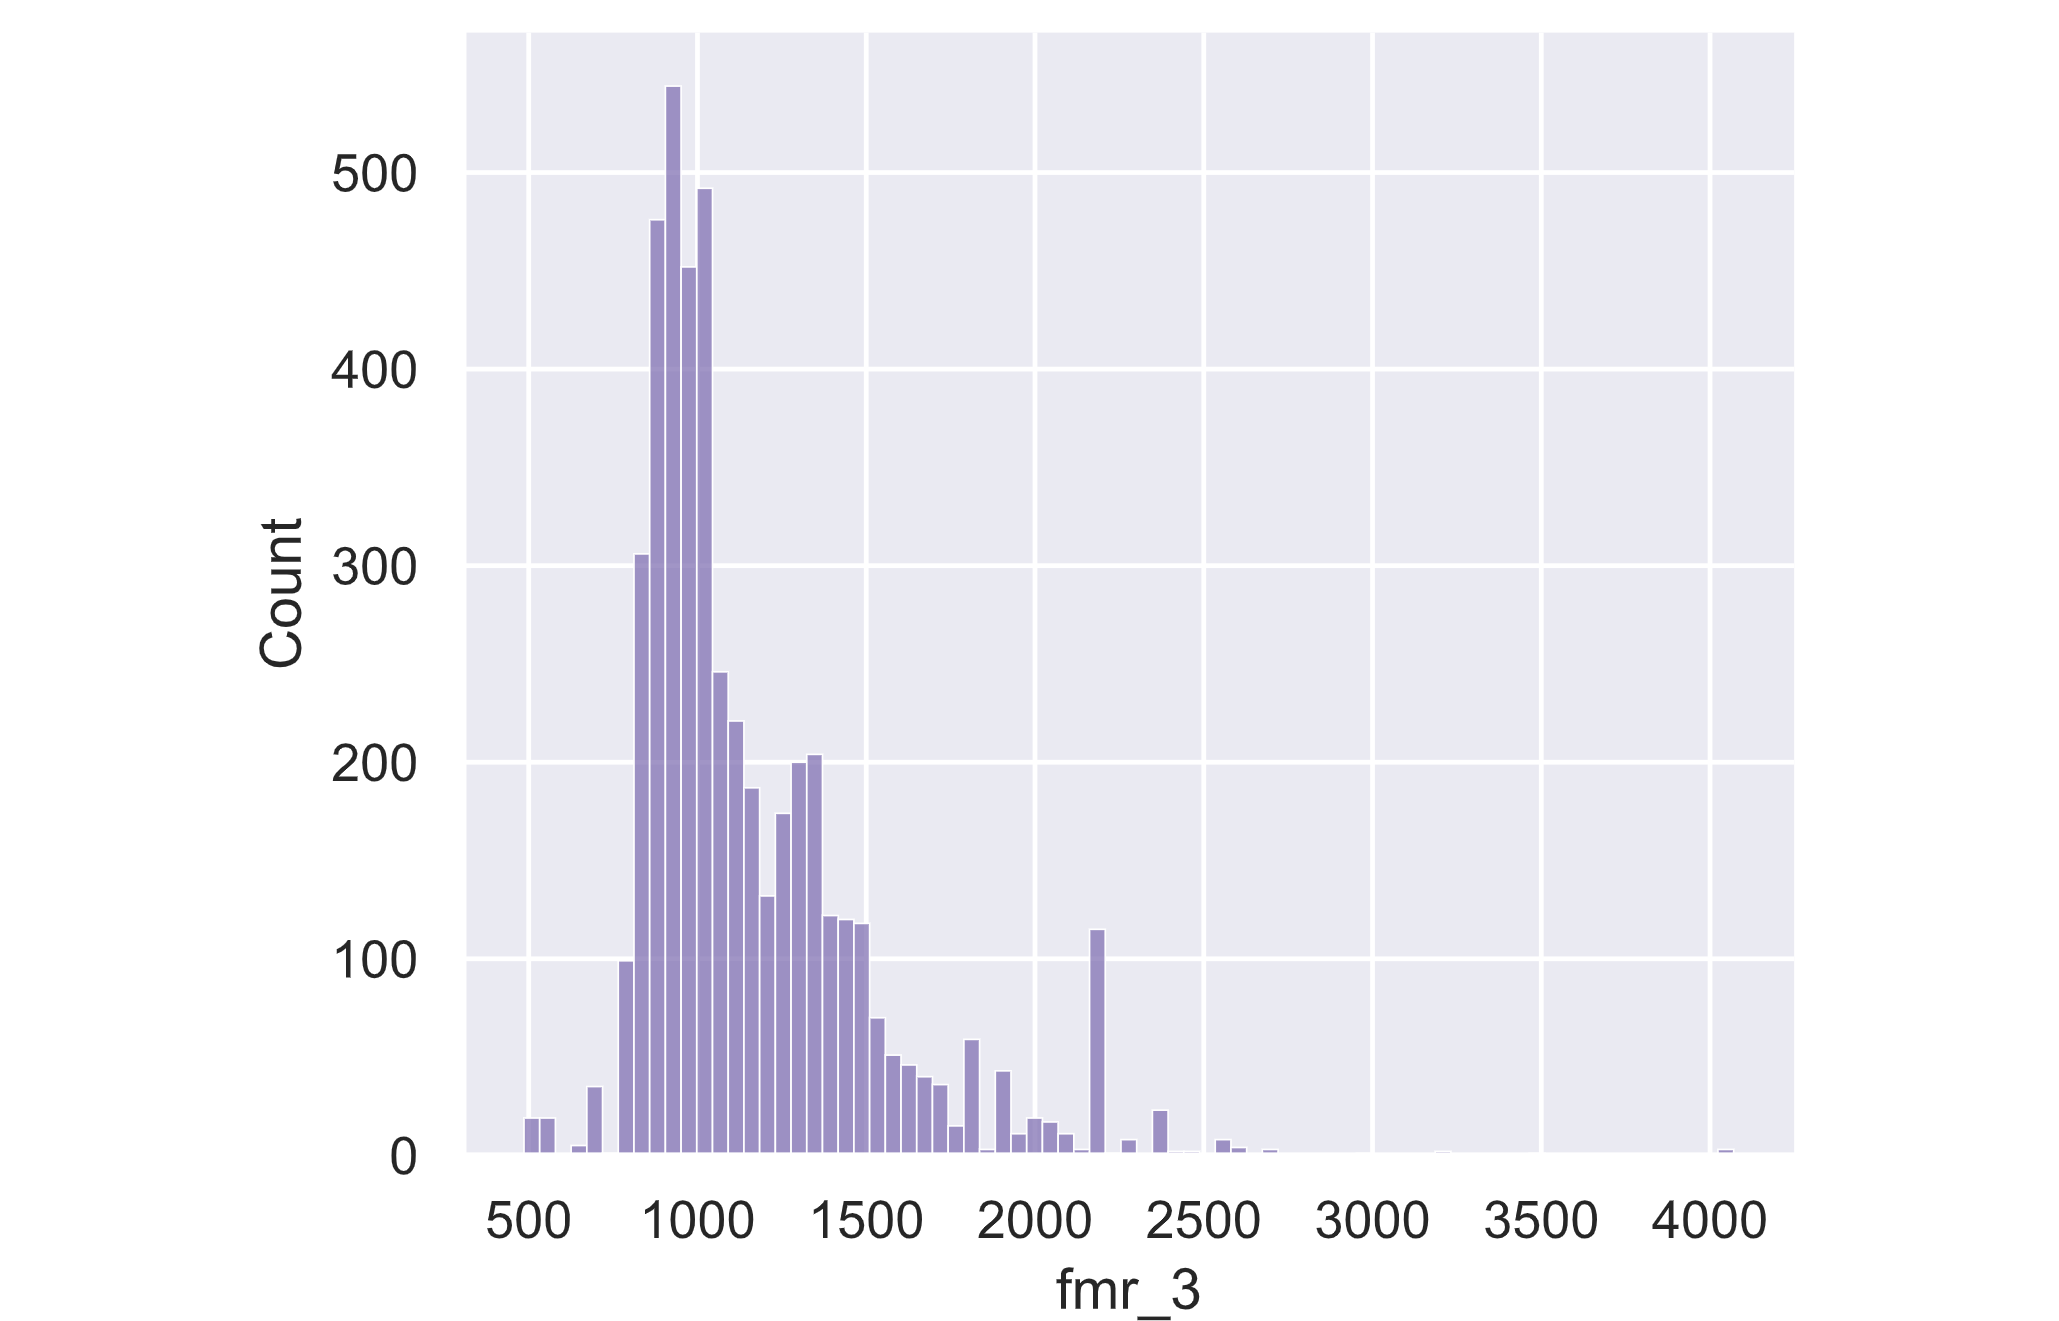

**Using a custom palette**

In [ ]:
palettes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
for p in paletttes: 
    sns.set_palette(p)
    sns.displot(df['Tuition'])

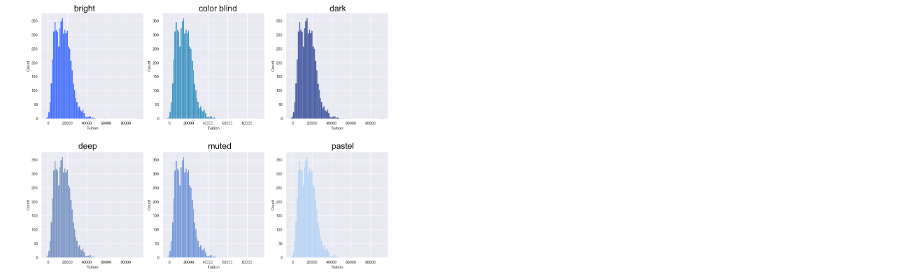

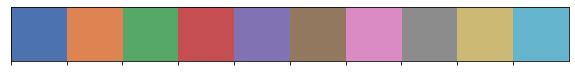

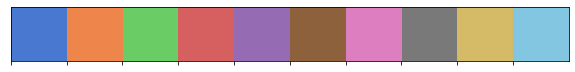

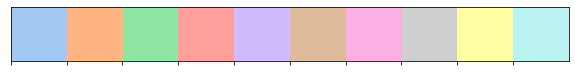

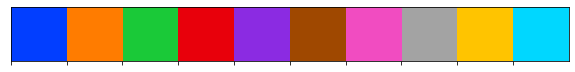

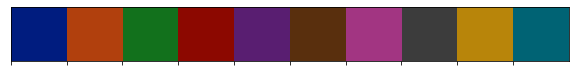

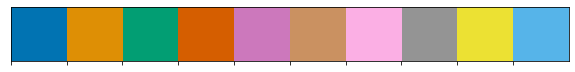

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
palettes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
for p in palettes:
    sns.set_palette(p) # displays a palette
    sns.palplot(sns.color_palette()) # returns the current palette
    plt.show()

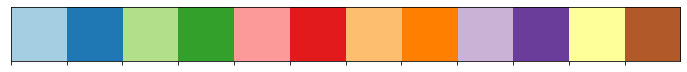

In [7]:
# Circular colors = when the data is not ordered, such as 'husl'
sns.palplot(sns.color_palette('Paired', 12))

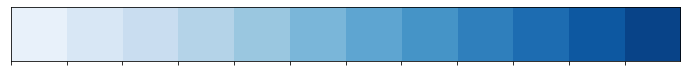

In [8]:
# Sequential colors = when the data has a consistent range from high to low, such as 'Purples'
sns.palplot(sns.color_palette('Blues', 12))

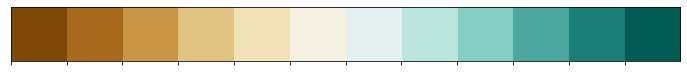

In [9]:
# Deverging colors = when both the low and high values are interesting, such as 'coolwarm' 
sns.palplot(sns.color_palette('BrBG', 12))

In [ ]:
# Set the style to "darkgrid"
sns.set_style('darkgrid')

# Set a custom color palette
custom_color =['#39A7D0','#36ADA4']
sns.set_palette(custom_color) # this can be tedious

# Create the box plot of age distribution by gender
sns.catplot(x="Gender", y="Age", 
            data=survey_data, kind="box",)

# Show plot
plt.show()

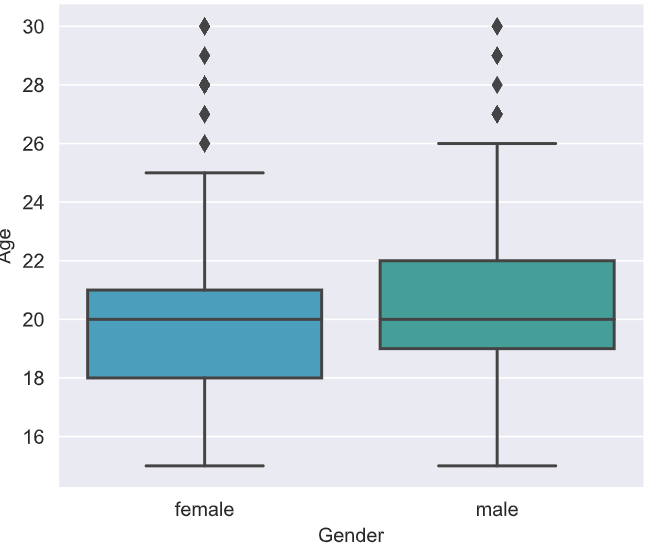

## 7. Customizing 

**Customizing with matplotlib**
<br>
*Using axes object to customize seaborn plots*

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of 1 bedroom rents
sns.histplot(df['fmr_1'], ax=ax)

# Modify the properties of the plot
ax.set(xlabel="1 Bedroom Fair Market Rent",
       xlim=(100,1500),
       title="US Rent")

# Display the plot
plt.show()

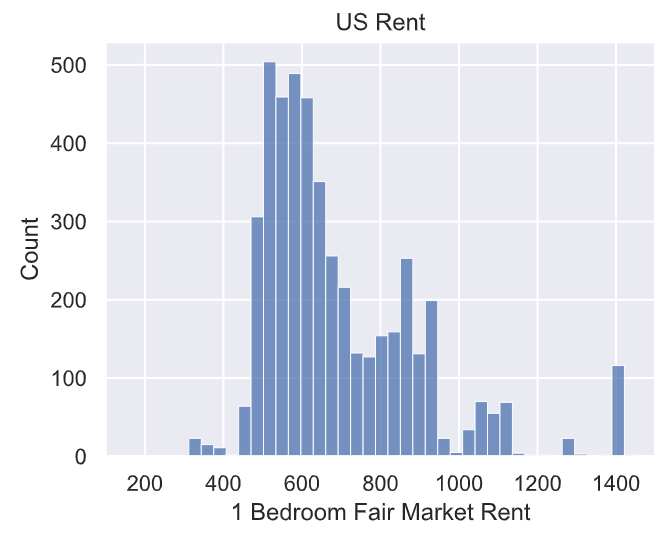

In [ ]:
# Adding anootations
# Create a figure and axes. Then plot the data
fig, ax = plt.subplots()
sns.histplot(df['fmr_1'], ax=ax)

# Customize the labels and limits
ax.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500), title="US Rent")

# Add vertical lines for the median and mean
ax.axvline(x=df['fmr_1'].median(), color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=df['fmr_1'].mean(), color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax.legend()
plt.show()

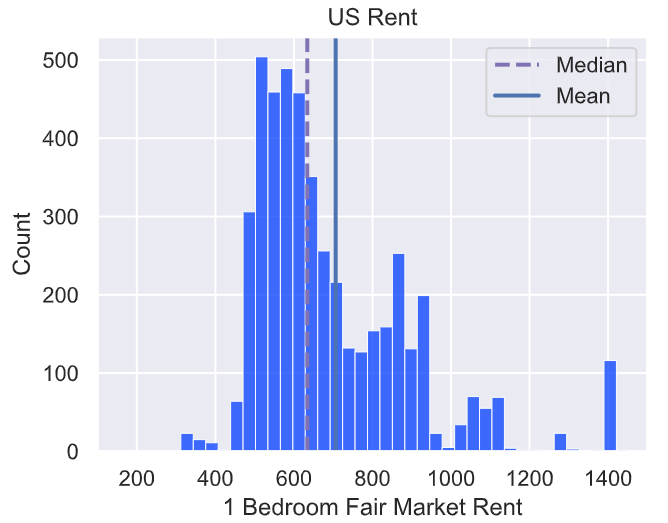

In [ ]:
# Multiple plots
# Create a plot with 1 row and 2 columns that share the y axis label
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

# Plot the distribution of 1 bedroom apartments on ax0
sns.histplot(df['fmr_1'], ax=ax0)
ax0.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500))

# Plot the distribution of 2 bedroom apartments on ax1
sns.histplot(df['fmr_2'], ax=ax1)
ax1.set(xlabel="2 Bedroom Fair Market Rent", xlim=(100,1500))

# Display the plot
plt.show()

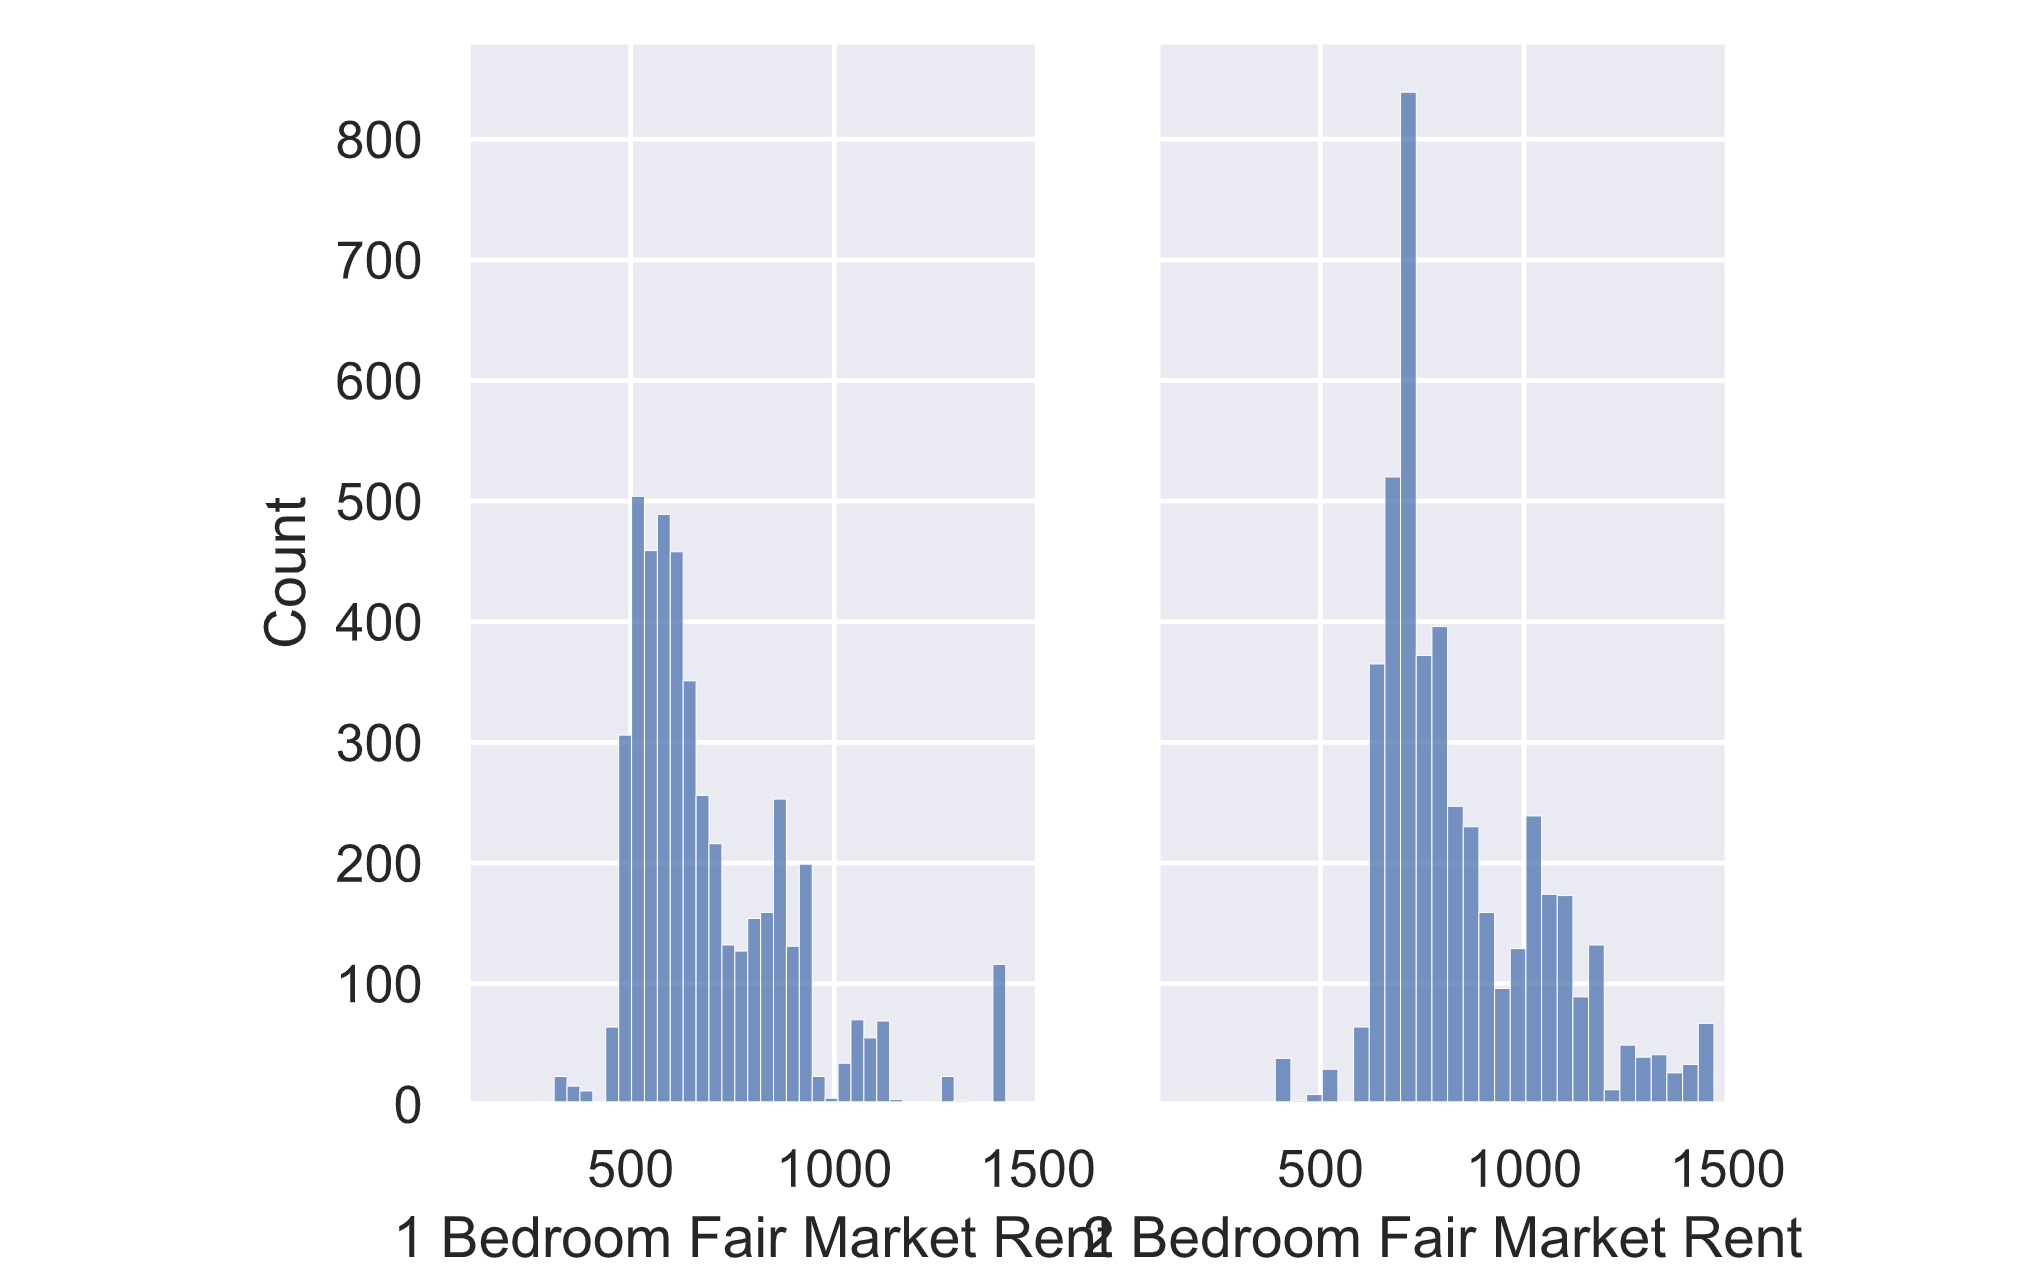

In [ ]:
# Set the figure style to "dark"
sns.set_style('dark')

# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Likes Techno", 
                data=survey_data, kind="bar",
                col='Gender')

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence", 
       ylabel="% Who Like Techno")

# Show plot
plt.show()

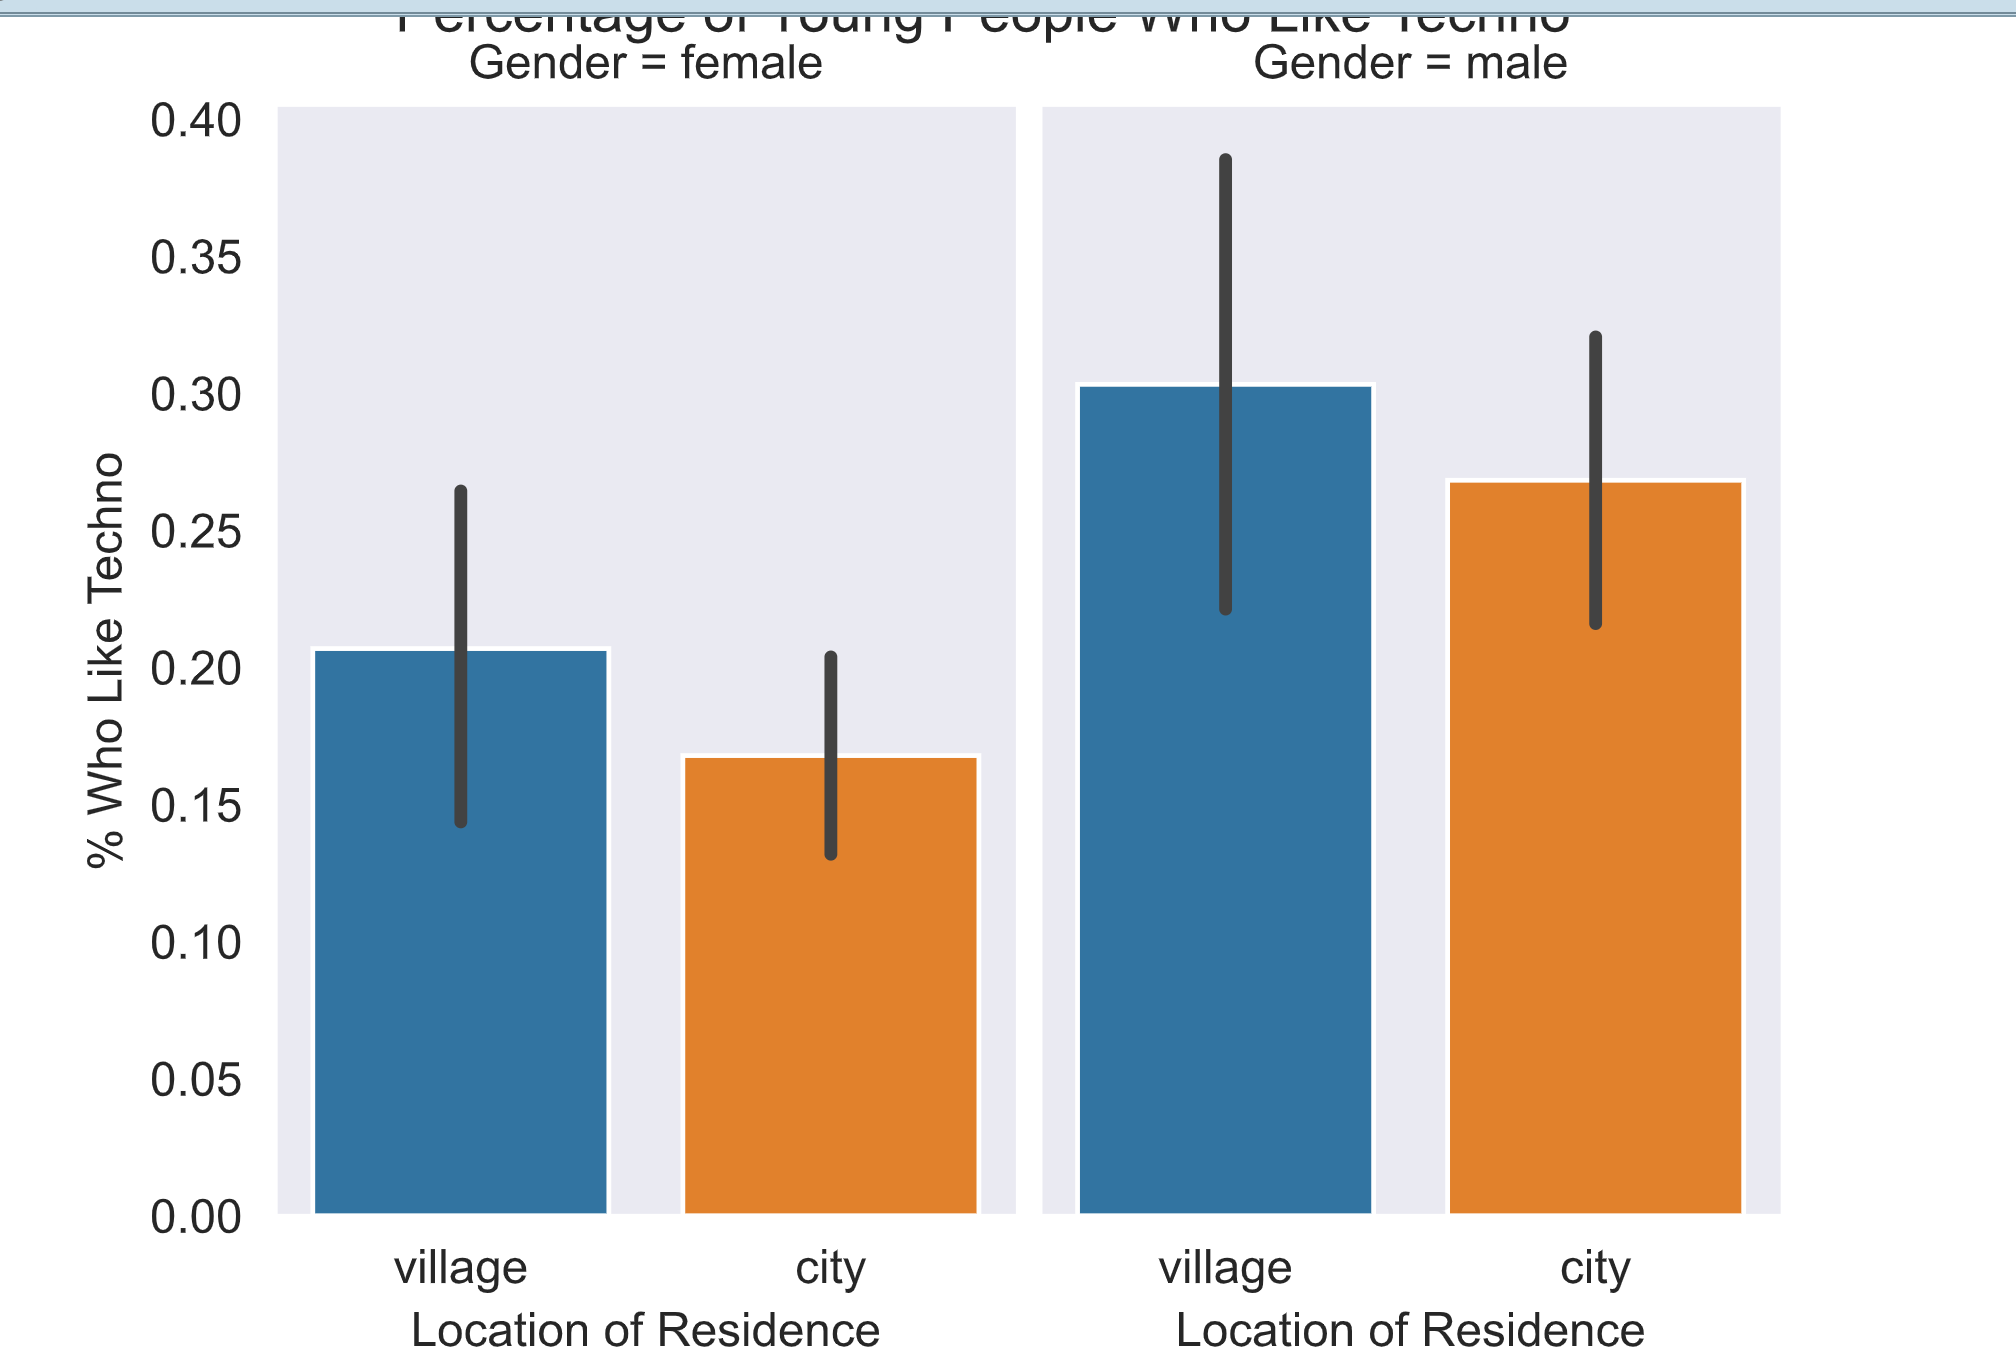

## 8. Matrix plot

In [ ]:
# heatmap() function requires date to be in a grid format
# crosstab() is frequently used to manipulate the data to be a table
# Create the crosstab DataFrame
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"])

# Customize the table 
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"], values=df['total_rentals'], aggfun='mean').round(0)

# Plot a heatmap of the table with no color bar and using the BuGn palette
sns.heatmap(pd_crosstab, cbar= False, cmap="BuGn", linewidths=0.3)
# Other arguments: annot = True, fmt = 'd' ensure the results displayed as integers
# centre the heatmap: centre = df_crosstab.loc[9,6]

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#Show the plot
plt.show()
plt.clf()

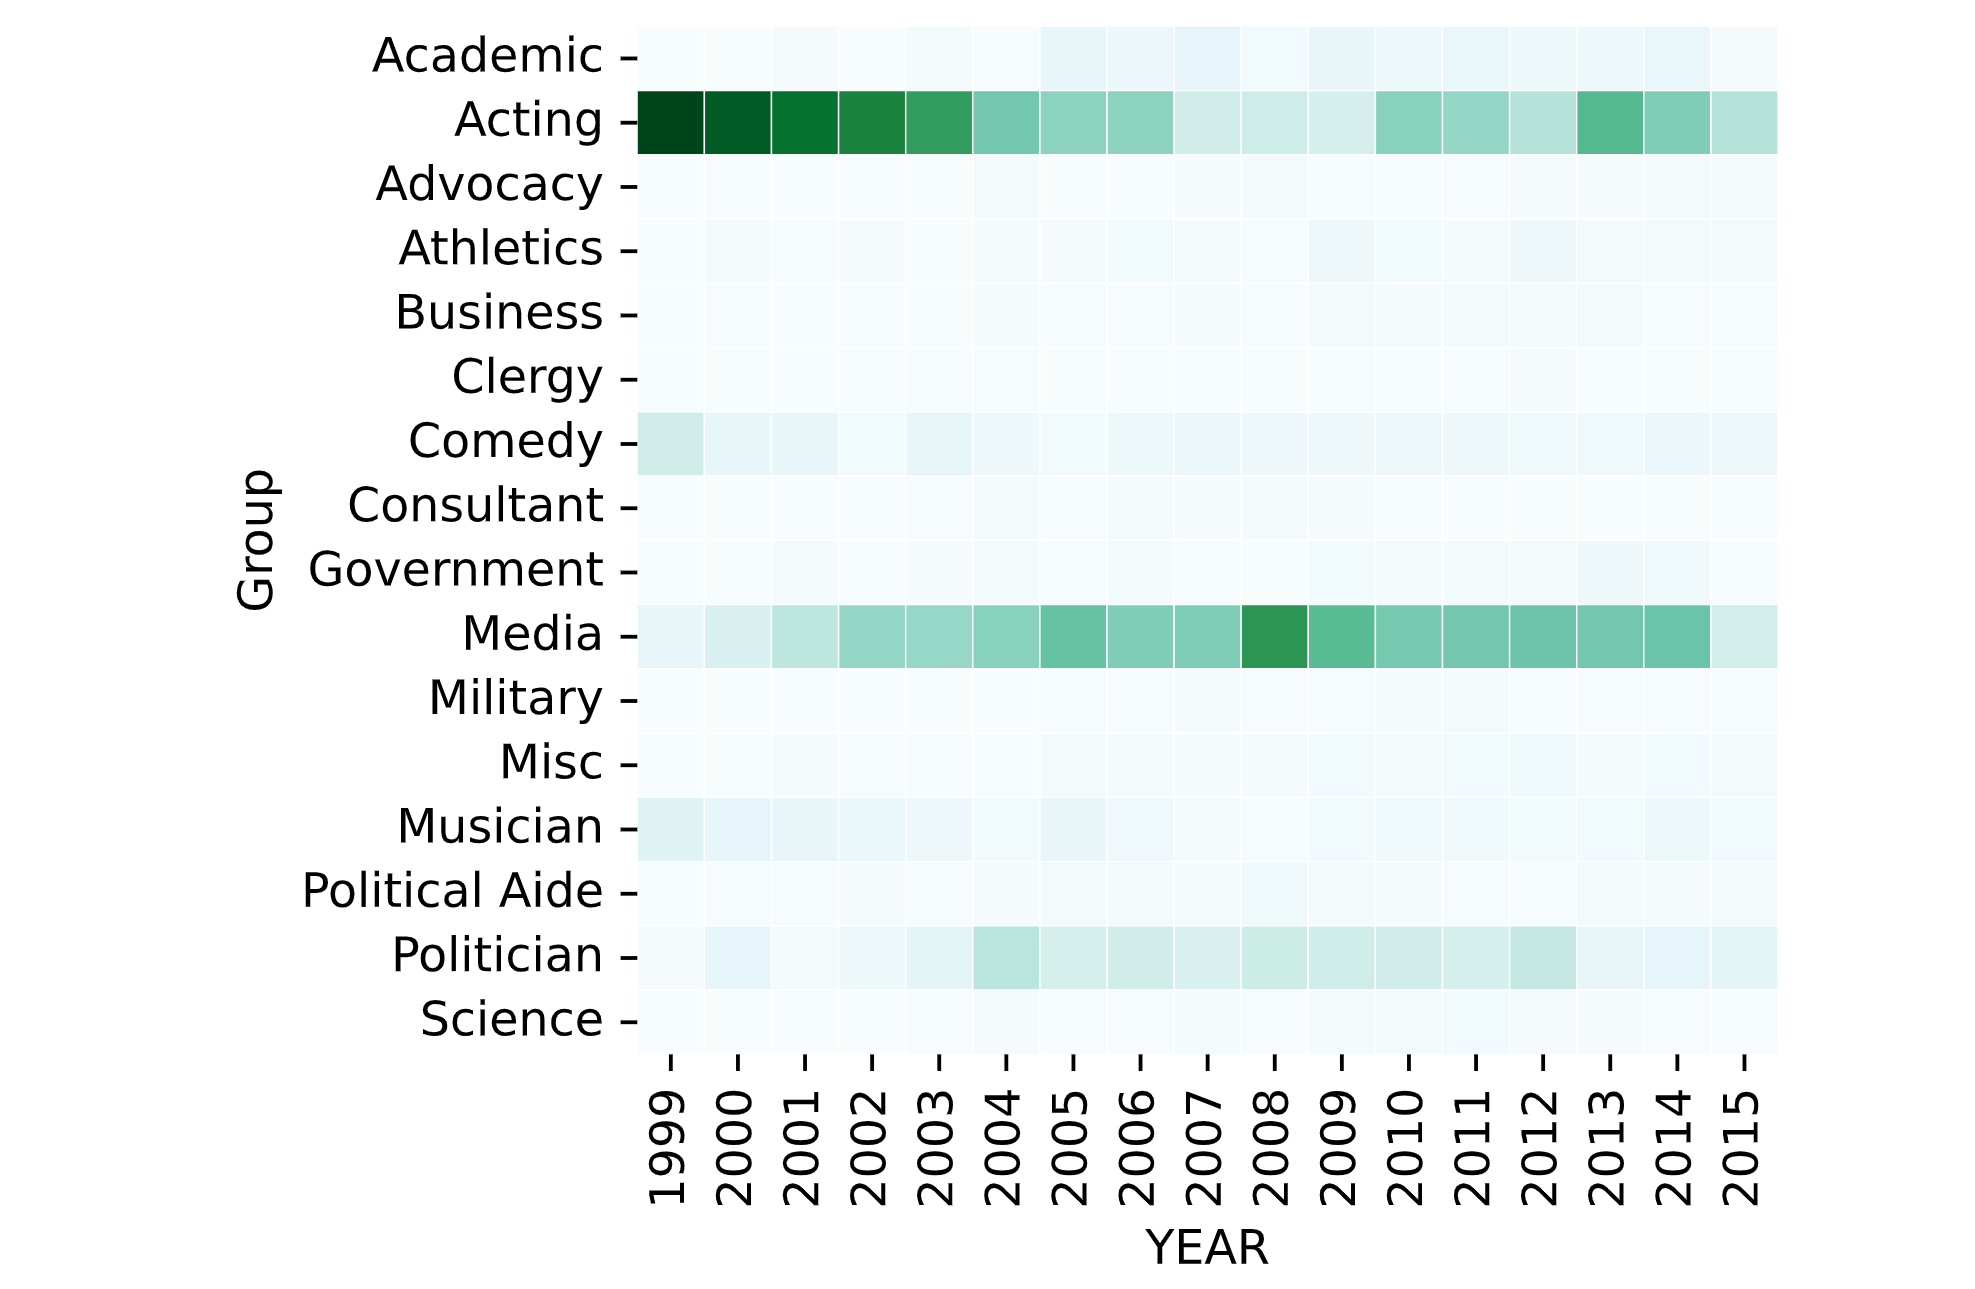

In [ ]:
cols = ['total_rentals', 'temp', 'casual', 'hum', 'widespeed']
sns.headmap(df[cols].corr(), cmap = 'YlGnBu')

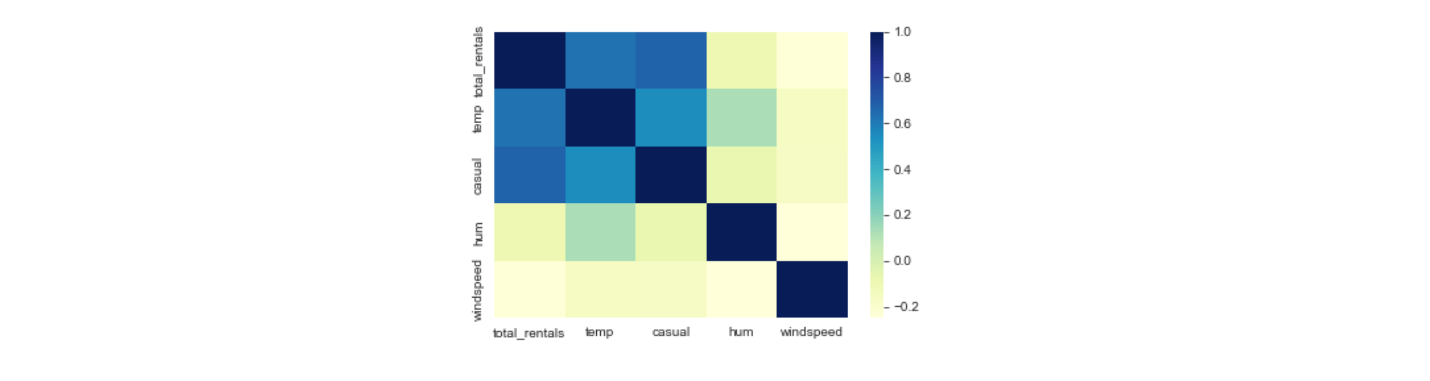

## 9. PairGrid and pairplot
- *To compare paired data across the columns*
- *To show pairwise relationships between data elements*
- *pairplot is another version of PairGrid*

In [ ]:
# Create the same PairGrid but map a histogram on the diag
# vars showing the columns to compare
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
# map_diag show the chart type of the left-upper to right-down angle 
g2 = g.map_diag(sns.histplot)
# map_diag show the chart type of the right-upper to left-down angle 
g3 = g2.map_offdiag(sns.scatterplot)

plt.show()
plt.clf()

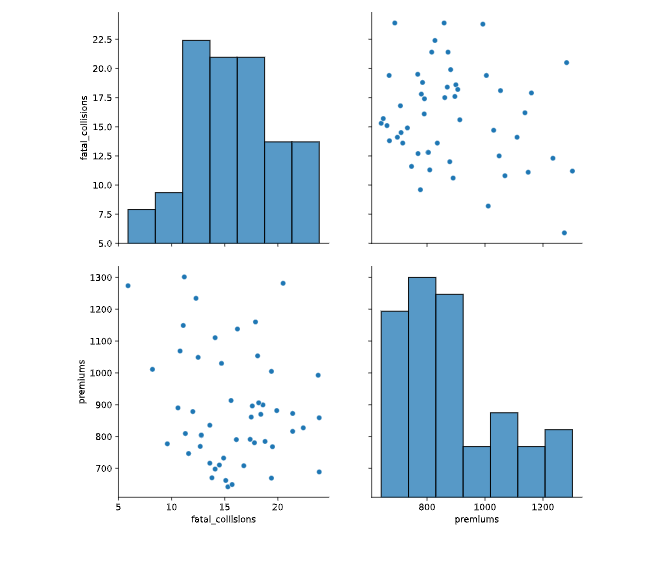

In [ ]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()
plt.clf()

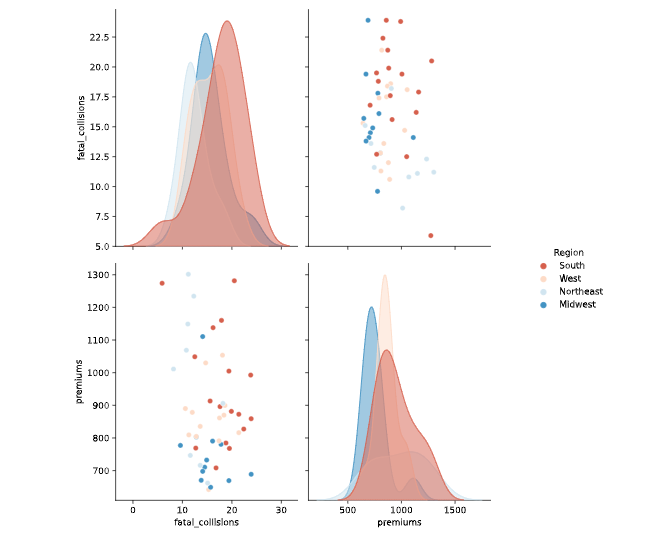

In [ ]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()
plt.clf()

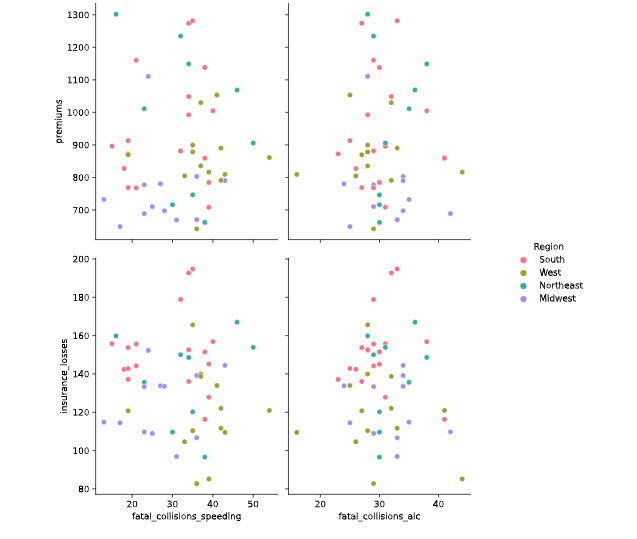

In [ ]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()

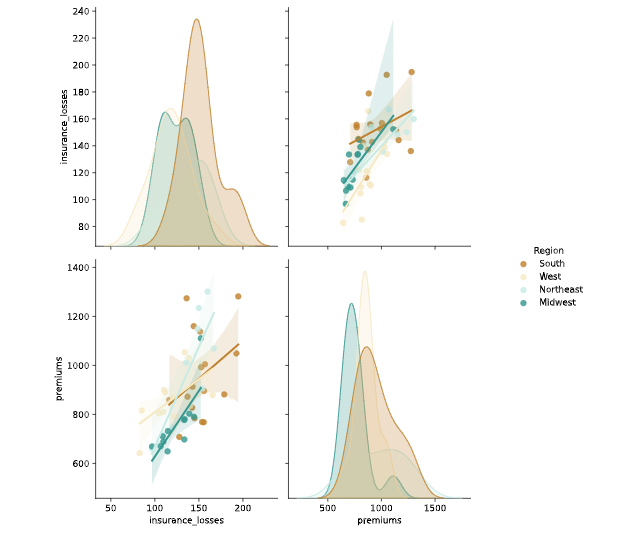

## 10. JointGrid and jointplot
- *To compare distributions of data between two variables*
- *JointGrid makes use of scatter plots, regression line, histograms, distribution plots, and kernel distribution estimates.*
- *jointplot support simple creation of scatter, hex, residual, regression and kde plots.* 

In [ ]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")

g = sns.JointGrid(x="hum",
            y="total_rentals",
            data=df,
            xlim=(0.1, 1.0)) 

g.plot(sns.regplot, sns.histplot)

# to set differnet plonts in joint and margins
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade = True)

plt.show()
plt.clf()

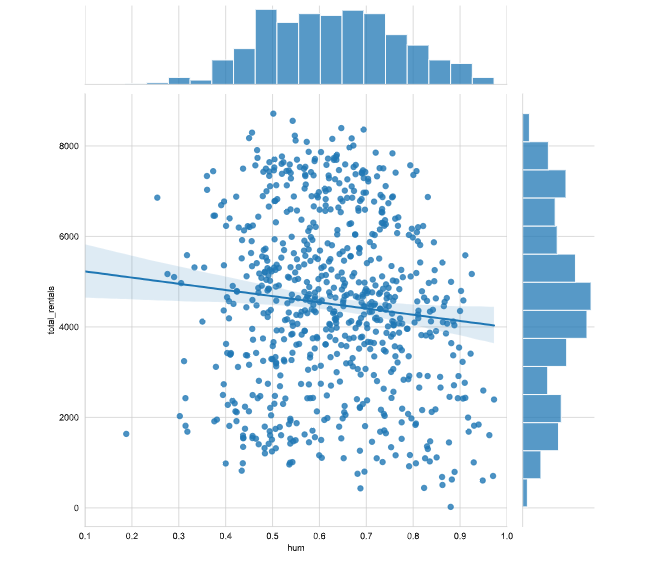

In [ ]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
         y="total_rentals",
         kind='reg',
         data=df,
         order=2,
         xlim=(0, 1))

plt.show()
plt.clf()

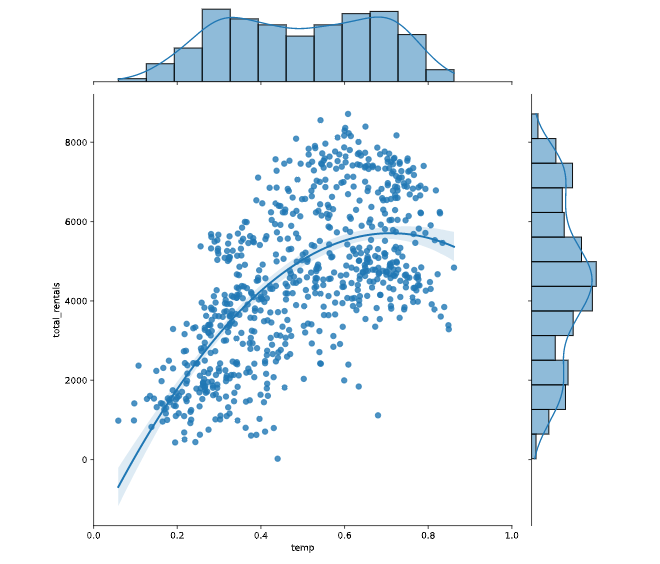

In [ ]:
# build regression and residual line
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
         y="total_rentals",
         kind='reg',
         data=df,
         order=2,
         xlim=(0, 1))

plt.show()
plt.clf()

# Plot a jointplot showing the residuals
sns.jointplot(x="temp",
        y="total_rentals",
        kind='resid',
        data=df,
        order=2)

plt.show()
plt.clf()

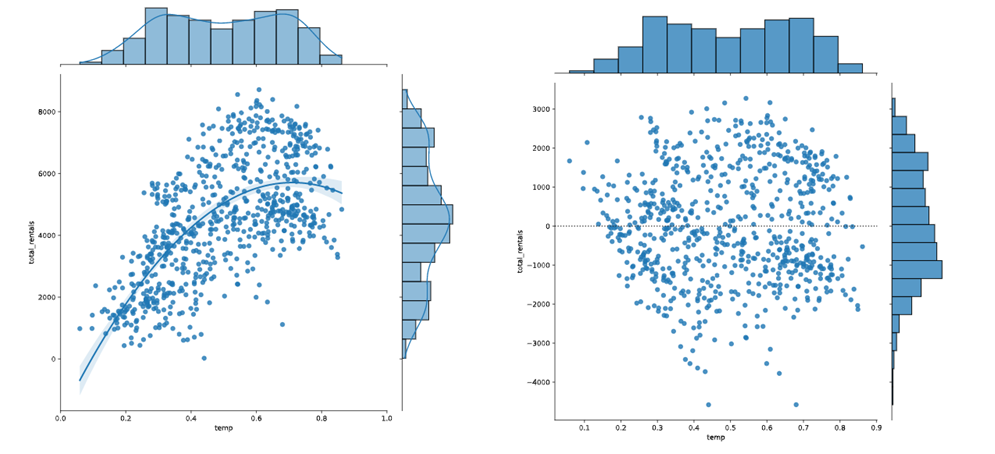

In [ ]:
# Replicate the above plot but only for registered riders
g = sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10))

# Using query to filter the data argument 
data=df.query('UG < 2500 & Ownership == 'Public')

g.plot_joint(sns.kdeplot)

plt.show()
plt.clf()

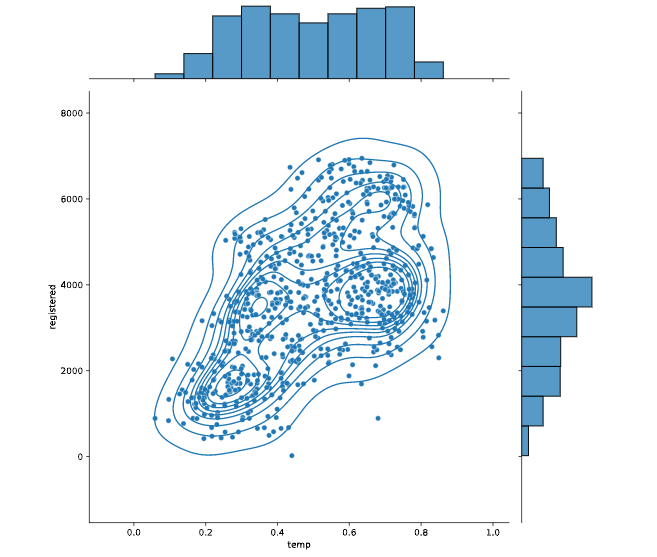